# Transfer Learning VGG19 using Keras


# 

In [36]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

## import the libraries as shown below

In [37]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [38]:
# re-sizing all the images 
IMAGE_SIZE = [224, 224]

train_path = 'tomato/Training'
valid_path = 'tomato/Test'

In [39]:

# Import the VGG19 library and adding preprocessing layer 
# Here we will be using imagenet weights

VGG = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [40]:
VGG.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [41]:
for layer in VGG.layers:
    layer.trainable = False

In [42]:
  # number of output classes
folders = glob('tomato/Training/*')

In [43]:
folders

['tomato/Training/Tomato_healthy', 'tomato/Training/Tomato_Early_blight']

In [44]:
#Flattening the layer
x = Flatten()(VGG.output)

In [45]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=VGG.input, outputs=prediction)

In [49]:
#  structure of the model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [50]:
# cost and optimization method applied
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

## Data Augmentation using ImageDataGenerator

In [51]:
# Using the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [54]:
training_set = train_datagen.flow_from_directory('tomato/Training',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1807 images belonging to 2 classes.


In [55]:
test_set = test_datagen.flow_from_directory('tomato/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 784 images belonging to 2 classes.


## Fitting Model

In [56]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/20
57/57 [==============================] - 730s 13s/step - loss: 0.2732 - accuracy: 0.9037 - val_loss: 0.0895 - val_accuracy: 0.9694
Epoch 2/20
57/57 [==============================] - 821s 14s/step - loss: 0.0501 - accuracy: 0.9878 - val_loss: 0.0613 - val_accuracy: 0.9770
Epoch 3/20
57/57 [==============================] - 987s 17s/step - loss: 0.0375 - accuracy: 0.9906 - val_loss: 0.0559 - val_accuracy: 0.9834
Epoch 4/20
57/57 [==============================] - 963s 17s/step - loss: 0.0332 - accuracy: 0.9911 - val_loss: 0.0346 - val_accuracy: 0.9898
Epoch 5/20
57/57 [==============================] - 988s 17s/step - loss: 0.0210 - accuracy: 0.9967 - val_loss: 0.0330 - val_accuracy: 0.9911
Epoch 6/20
57/57 [==============================] - 1041s 18s/step - loss: 0.0178 - accuracy: 0.9961 - val_loss: 0.0469 - val_accuracy: 0.9834
Epoch 7/20
57/57 [==============================] - 924s 16s/step - loss: 0.0157 - accuracy: 0.9972 - val_loss: 0.0258 - val_accuracy: 0.9949
Epoch

In [57]:
scores = model.evaluate(test_set)

25/25 [==============================] - 174s 7s/step - loss: 0.0453 - accuracy: 0.9847


## Plotting the accuracy and loss factors

In [58]:
import matplotlib.pyplot as plt

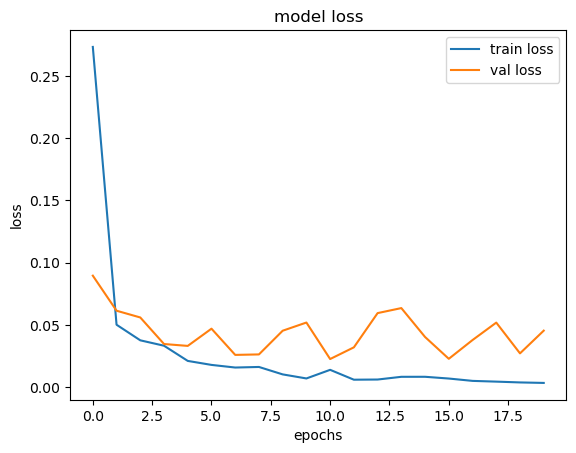

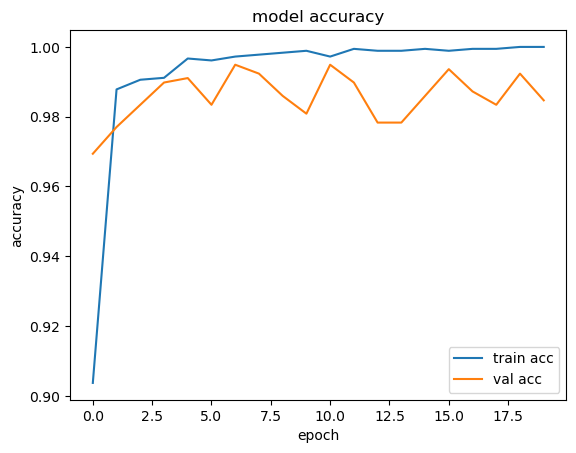

<Figure size 640x480 with 0 Axes>

In [65]:
# ploting the loss
plt.title('model loss')
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.ylabel('loss')
plt.xlabel('epochs')
plt.show()
plt.savefig('LossVal_loss')

# ploting the accuracy
plt.title('model accuracy')
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()
plt.savefig('AccVal_acc')

## saving the model as a h5 file

In [66]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_vgg19.h5')

In [67]:
y_pred = model.predict(test_set)

25/25 [==============================] - 172s 7s/step


In [68]:
y_pred

array([[6.7752357e-05, 9.9993229e-01],
       [3.4083573e-08, 1.0000000e+00],
       [9.9583083e-01, 4.1691670e-03],
       ...,
       [9.9999917e-01, 8.9080368e-07],
       [1.3475328e-06, 9.9999869e-01],
       [7.9750525e-06, 9.9999201e-01]], dtype=float32)

# Print validation confusion matrix

In [69]:
test_labels = test_set.classes


In [70]:
from sklearn.metrics import confusion_matrix

In [71]:
conf_matrix=confusion_matrix(test_labels, y_pred.argmax(axis=1))

[Text(0, 0.5, 'Early_bright'), Text(0, 1.5, 'Healthy')]

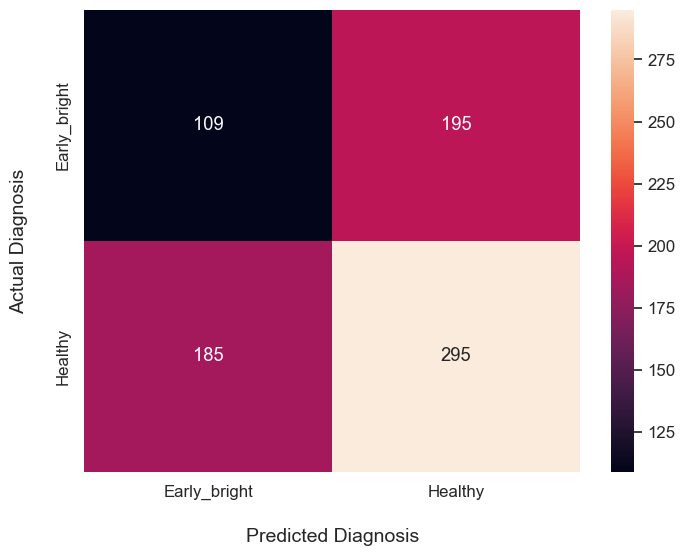

In [72]:
import seaborn as sns
plt.figure(figsize=(8,6), dpi=100)
sns.set(font_scale = 1.1)
ax = sns.heatmap(conf_matrix, annot=True, fmt='d', )
# set x-axis label and ticks. 
ax.set_xlabel("Predicted Diagnosis", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(['Early_bright', 'Healthy'])
# set y-axis label and ticks
ax.set_ylabel("Actual Diagnosis", fontsize=14, labelpad=20)
ax.yaxis.set_ticklabels(['Early_bright', 'Healthy'])

In [73]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [74]:
y_pred


array([1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,

## Loading model

In [75]:
 
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [76]:
model=load_model('model_vgg19.h5')

## Run prediction on a sample image

In [77]:
img=image.load_img('tomato/Test/Tomato_Early_blight/e2.JPG',target_size=(224,224))

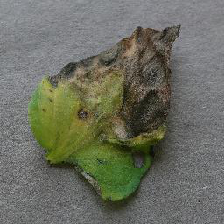

In [78]:
img

In [79]:
x=image.img_to_array(img)
x

array([[[139., 143., 146.],
        [146., 150., 153.],
        [150., 154., 157.],
        ...,
        [127., 126., 131.],
        [133., 132., 137.],
        [139., 138., 143.]],

       [[145., 149., 152.],
        [151., 155., 158.],
        [155., 159., 162.],
        ...,
        [134., 133., 138.],
        [136., 135., 140.],
        [139., 138., 143.]],

       [[136., 140., 143.],
        [141., 145., 148.],
        [144., 148., 151.],
        ...,
        [142., 141., 146.],
        [139., 138., 143.],
        [138., 137., 142.]],

       ...,

       [[ 96.,  96.,  96.],
        [ 93.,  93.,  93.],
        [101., 101., 101.],
        ...,
        [ 89.,  89.,  91.],
        [109., 109., 111.],
        [114., 114., 116.]],

       [[117., 117., 117.],
        [107., 107., 107.],
        [122., 122., 122.],
        ...,
        [ 96.,  96.,  98.],
        [119., 119., 121.],
        [138., 138., 140.]],

       [[111., 111., 111.],
        [110., 110., 110.],
        [ 95.,  

In [80]:
x.shape

(224, 224, 3)

In [81]:
x=x/255

In [82]:
x=np.expand_dims(x,axis=0)


In [83]:
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [84]:
img_data=abs(img_data)

img_data

array([[[[103.366455, 116.218216, 123.1349  ],
         [103.339005, 116.190765, 123.10745 ],
         [103.32332 , 116.17508 , 123.09177 ],
         ...,
         [103.42528 , 116.28488 , 123.18196 ],
         [103.40175 , 116.26135 , 123.15843 ],
         [103.37822 , 116.23782 , 123.1349  ]],

        [[103.342926, 116.19469 , 123.111374],
         [103.3194  , 116.17116 , 123.087845],
         [103.30371 , 116.15547 , 123.07216 ],
         ...,
         [103.39783 , 116.25743 , 123.15451 ],
         [103.389984, 116.24959 , 123.14667 ],
         [103.37822 , 116.23782 , 123.1349  ]],

        [[103.37822 , 116.22998 , 123.14667 ],
         [103.35861 , 116.21037 , 123.12706 ],
         [103.34685 , 116.19861 , 123.115295],
         ...,
         [103.366455, 116.22606 , 123.12314 ],
         [103.37822 , 116.23782 , 123.1349  ],
         [103.38214 , 116.241745, 123.138824]],

        ...,

        [[103.56253 , 116.40253 , 123.30353 ],
         [103.574295, 116.41429 , 123.31529 ]

In [85]:
model.predict(img_data)

1/1 [==============================] - 0s 329ms/step


array([[9.996873e-01, 3.127485e-04]], dtype=float32)

In [86]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 265ms/step


In [87]:
if(a==1):
    print("Uninfected")
else:
    print("Infected by early bright disease")

Infected by early bright disease
